# Data Modeling with Scikit-Learn

**Outline:**

* [Intro to Scikit-Learn](#Intro-to-Scikit-Learn)
* [Loading Iris Data](#Loading-Iris-Data)
* [Creating a Model](#Creating-a-Model)
* [Training and Testing a Model](#Training-and-Testing-a-Model)
  * [Performing Cross-Validation](#Performing-Cross-Validation)
  * [Selecting Features](#Selecting-Features)
  * [Searching for Optimal Model Parameters](#Searching-for-Optimal-Model-Parameters)
* [Evaluating a Model](#Evaluating-a-Model)
* [Model Persistence](#Model-Persistence)
* [Scikit-Learn Algorithm Cheat Sheet](#Scikit-Learn-Algorithm-Cheat-Sheet)

![](supervised-classification.png)
<div style="text-align: center;">
<strong>Credit:</strong> http://www.nltk.org/book/ch06.html
</div>

## Intro to Scikit-Learn

In [ ]:
from IPython.core.display import HTML
HTML("<iframe src=http://scikit-learn.org/ width=800 height=350></iframe>")

## Loading Iris Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
X = df.drop(['species'], axis=1)
y = df['species']

## Creating a Model

**Note:** 4-step modeling pattern

### K-nearest neighbors (KNN) classification

**Step 1:** Import the model (import)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** Instantiate an estimator (instantiate)

In [5]:
knn = KNeighborsClassifier(n_neighbors=1)

**Step 3:** Fit the model (fit)

In [8]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

**Step 4:** Make a prediction (predict)

In [9]:
X_new = [[3, 5, 4, 2]]
knn.predict(X_new)

array(['virginica'], dtype=object)

In [10]:
X_new = [
    [3, 5, 4, 2], 
    [5, 4, 3, 2]
]
knn.predict(X_new)

array(['virginica', 'versicolor'], dtype=object)

### Try a different value for K

In [11]:
# instantiate
knn = KNeighborsClassifier(n_neighbors=10)

# fit
knn.fit(X, y)

# predict
knn.predict(X_new)

array(['versicolor', 'versicolor'], dtype=object)

### Use a different classification model

In [12]:
# import
from sklearn.linear_model import LogisticRegression

# instantiate
logreg = LogisticRegression()

# fit
logreg.fit(X, y)

# predict
logreg.predict(X_new)

array(['virginica', 'setosa'], dtype=object)

In [13]:
from sklearn import svm

clf = svm.SVC()

clf.fit(X, y)

clf.predict(X_new)

array(['virginica', 'versicolor'], dtype=object)

## Training and Testing a Model

### Procedure 1: Train and test on the (same) entire dataset

In [14]:
from sklearn.datasets import load_iris
from sklearn import metrics

iris = load_iris()

X = iris.data
y = iris.target

### Logistic Regression

In [15]:
# import
from sklearn.linear_model import LogisticRegression

# instantiate
logreg = LogisticRegression()

# fit
logreg.fit(X, y)

# predict
y_pred = logreg.predict(X)

metrics.accuracy_score(y, y_pred)

0.96

### KNN (K = 5)

In [16]:
# import
from sklearn.neighbors import KNeighborsClassifier

# instantiate
knn = KNeighborsClassifier(n_neighbors=5)

# fit
knn.fit(X, y)

# predict
y_pred = knn.predict(X)

metrics.accuracy_score(y, y_pred)

0.9666666666666667

### KNN (K = 1)

In [17]:
# instantiate
knn = KNeighborsClassifier(n_neighbors=1)

# fit
knn.fit(X, y)

# predict
y_pred = knn.predict(X)

metrics.accuracy_score(y, y_pred)

1.0

### Procedure 2: Train and test split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [19]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [20]:
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


### Logistic Regression

In [21]:
# instantiate
logreg = LogisticRegression()

# fit
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.9333333333333333

### KNN (K = 5)

In [22]:
# instantiate
knn = KNeighborsClassifier(n_neighbors=5)

# fit
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

### KNN (K = 1)

In [23]:
# instantiate
knn = KNeighborsClassifier(n_neighbors=1)

# fit
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.9333333333333333

### Find a better value for K

In [24]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [25]:
scores

[0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

Text(0,0.5,'Testing Accuracy')

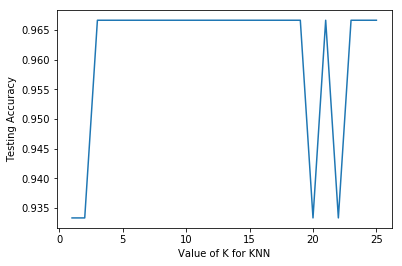

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Select the best value for K

In [ ]:
# instantiate
knn = KNeighborsClassifier(n_neighbors=11)

# fit
knn.fit(X, y)

# predict
X_new = [[3, 5, 4, 2]]
knn.predict(X_new)

### Performing Cross-Validation

* Parameter tuning
* Model selection
* Feature selection

In [29]:
from sklearn.cross_validation import KFold

kf = KFold(25, n_folds=5, shuffle=False)

print('{} {:^65} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^10} {} {:^30}'.format(iteration, str(data[0]), str(data[1])))

Iteration                     Training set observations                     Testing set observations
    1      [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]          [0 1 2 3 4]          
    2      [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]          [5 6 7 8 9]          
    3      [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]        [10 11 12 13 14]       
    4      [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]        [15 16 17 18 19]       
    5      [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]        [20 21 22 23 24]       


In [30]:
from sklearn.cross_validation import cross_val_score

knn = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)

[0.93333333 1.         0.93333333 0.93333333 1.        ]


In [31]:
print(scores.mean())

0.96


Let's try varying the value for K.

In [32]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0,0.5,'Cross-Validated Accuracy')

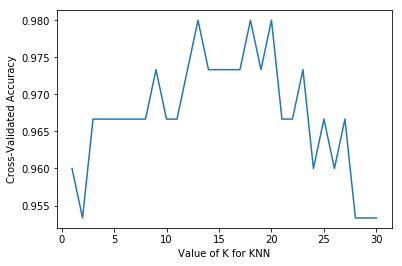

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Selecting Features

In [34]:
import pandas as pd

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')

In [35]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [36]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [37]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [45]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
scores

array([-3.56038438, -3.29767522, -2.08943356, -2.82474283, -1.3027754 ,
       -1.74163618, -8.17338214, -2.11409746, -3.04273109, -2.45281793])

In [40]:
import numpy as np

mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
rmse_scores.mean()

1.6913531708051797

In [41]:
import numpy as np

feature_cols = ['TV', 'radio']
X = data[feature_cols]
np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean()

1.6796748419090768

In [42]:
import numpy as np

feature_cols = ['TV']
X = data[feature_cols]
np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean()

3.2552805574433696

In [43]:
import numpy as np

feature_cols = ['newspaper']
X = data[feature_cols]
np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean()

5.0684209546812165

In [44]:
import numpy as np

feature_cols = ['radio', 'newspaper']
X = data[feature_cols]
np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean()

4.265009423551607

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
rf.feature_importances_

array([0.63441385, 0.35683765, 0.0087485 ])

### Searching for Optimal Model Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
k_range = list(range(1, 31))
print(k_range)

In [ ]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = iris.data
y = iris.target

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid.fit(X, y)
grid.cv_results_

In [ ]:
grid_mean_scores = []
for result in grid.cv_results_['mean_test_score']:
    grid_mean_scores.append(result)

In [ ]:
grid_mean_scores = [result for result in grid.cv_results_['mean_test_score']]
print(grid_mean_scores)

In [ ]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

## Evaluating a Model

UCI Machine Learning Repository: [Spambase Data Set](https://archive.ics.uci.edu/ml/datasets/Spambase)

In [ ]:
import pandas as pd

In [ ]:
spam = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)

In [ ]:
spam.head()

In [ ]:
X = spam.drop(57, axis=1)
y = spam[57]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_class = logreg.predict(X_test)

In [ ]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred_class))

**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [ ]:
pd.Series(y_test).value_counts()

In [ ]:
pd.Series(y_test).value_counts().head(1) / len(y_test)

### Confusion Matrix

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred_class))

In [ ]:
print(metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
print(metrics.recall_score(y_test, y_pred_class))

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [ ]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

### Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class, target_names=['ham', 'spam']))

### Receiver Operating Characteristic (ROC)

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

In [ ]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of spam')
plt.ylabel('Frequency')

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

In [ ]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for spam classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Area Under Curve (AUC)

In [ ]:
metrics.roc_auc_score(y_test, y_pred_prob)

## Model Persistence

Suppose we have a model below.

In [49]:
from sklearn.cross_validation import train_test_split

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)
y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.9833333333333333

Dump the model into a pickle file.

In [50]:
import pickle

f = open('tmp/knn.pkl', 'wb')
pickle.dump(knn, f)
f.close()

In [51]:
!ls tmp

adult.csv                knn.pkl                  wordcloud_x_multiply.png
adult.json               wordcloud_divide.png
example_new.txt          wordcloud_ed.png


Load the model from the pickle file.

In [52]:
f = open('tmp/knn.pkl', 'rb')
stored_knn = pickle.load(f)
f.close()

In [53]:
y_pred = stored_knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.9833333333333333

## Scikit-Learn Algorithm Cheat Sheet

![](scikit-learn-algorithm-cheat-sheet.png)
<div style="text-align: center;">
<strong>Credit:</strong> http://peekaboo-vision.blogspot.de/2013/01/machine-learning-cheat-sheet-for-scikit.html
</div>